# Data Analaysis for Character Recognition Tool

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_excel('../data/Github_Output_data.xlsx', sheet_name='Combined_Long')
df.head()

,Show,Time,Video,Character,Computer,Human_J,Human_R,Referee_Human
0,CEG,:01-:15,1.0,Alex,0,0,0,0
1,CEG,:15-:30,1.0,Alex,1,0,0,0
2,CEG,:31-:45,1.0,Alex,0,0,0,0
3,CEG,:46-1:00,1.0,Alex,1,0,0,0
4,CEG,1:01-1:15,1.0,Alex,0,0,0,0


In [3]:
shows = pd.unique(df['Show']).tolist()
shows

['CEG', 'Q', 'ST', 'BL', 'TF', 'TM']

In [4]:
current_show_df = df[df['Show'] == shows[1]]
current_show_df.head()

,Show,Time,Video,Character,Computer,Human_J,Human_R,Referee_Human
640,Q,:01-:15,1.0,Alex_Parrish,1,1,1,1
641,Q,:15-:30,1.0,Alex_Parrish,1,1,1,1
642,Q,:31-:45,1.0,Alex_Parrish,1,1,1,1
643,Q,:46-1:00,1.0,Alex_Parrish,1,1,1,1
644,Q,1:01-1:15,1.0,Alex_Parrish,1,1,1,1


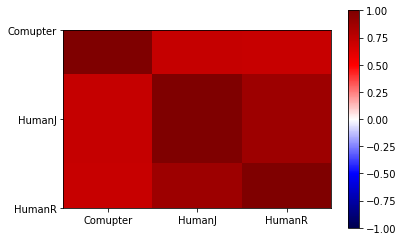

In [5]:
c = df['Computer'].values;
j = df['Human_J'].values;
r = df['Human_R'].values;
dd = np.vstack((c,j,r))
dd.shape

plt.imshow(np.corrcoef(dd), cmap = 'seismic', vmin =-1, vmax = 1);
plt.colorbar();
plt.xticks([0,1,2], ['Comupter','HumanJ','HumanR']);
plt.yticks([0,1,2], ['Comupter','HumanJ','HumanR']);



In [6]:
np.corrcoef(dd)

array([[1.        , 0.72514866, 0.71534808],
       [0.72514866, 1.        , 0.87791236],
       [0.71534808, 0.87791236, 1.        ]])

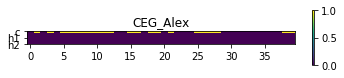

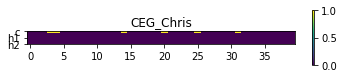

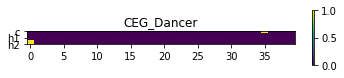

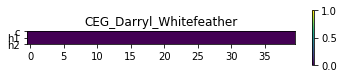

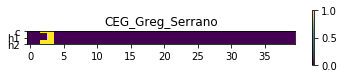

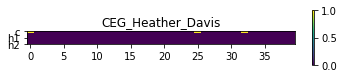

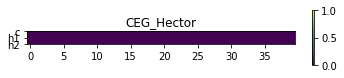

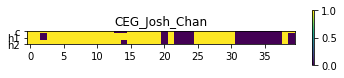

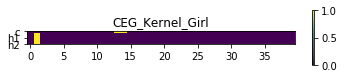

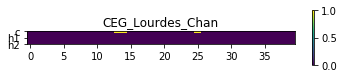

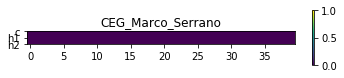

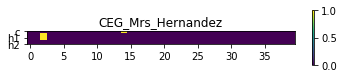

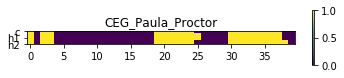

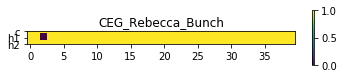

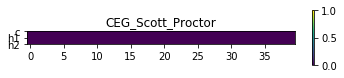

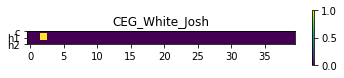

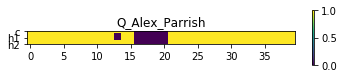

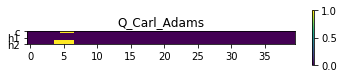

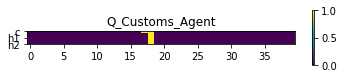

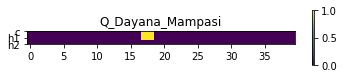

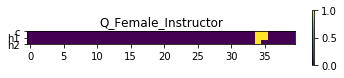

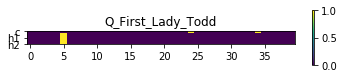

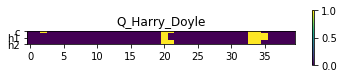

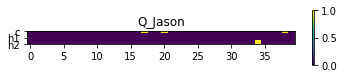

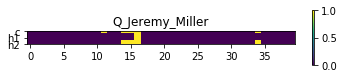

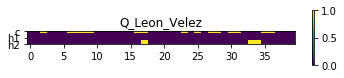

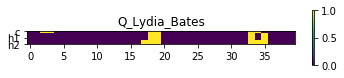

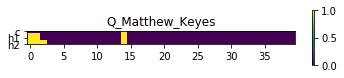

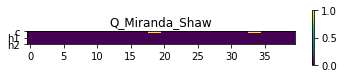

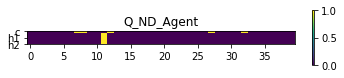

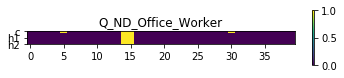

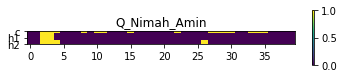

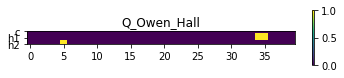

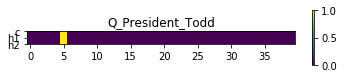

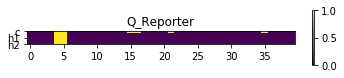

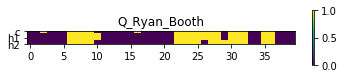

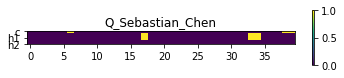

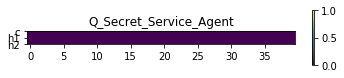

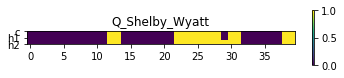

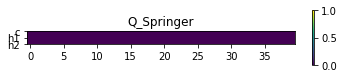

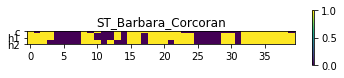

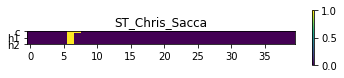

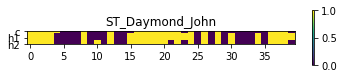

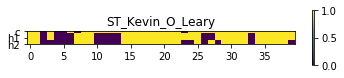

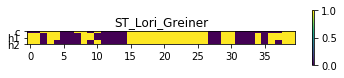

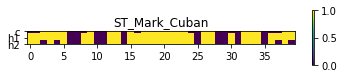

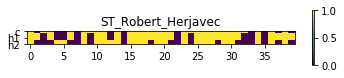

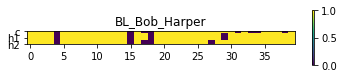

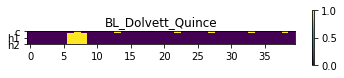

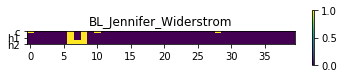

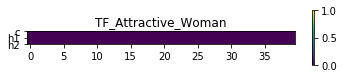

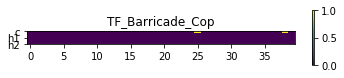

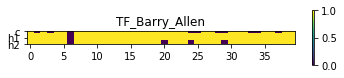

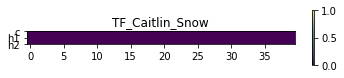

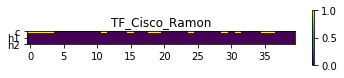

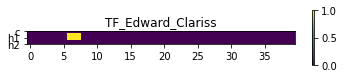

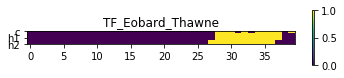

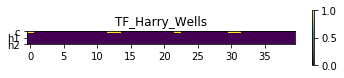

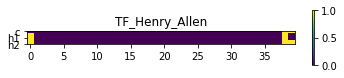

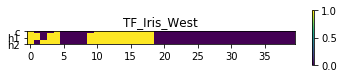

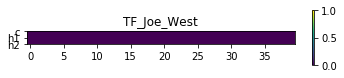

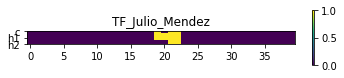

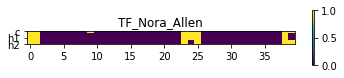

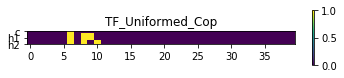

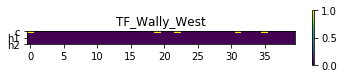

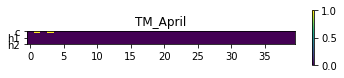

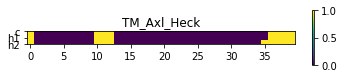

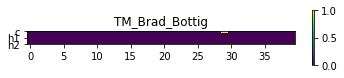

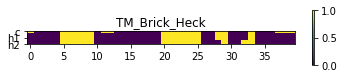

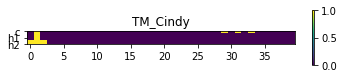

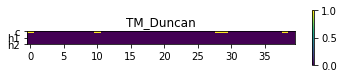

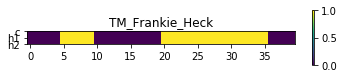

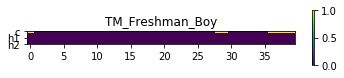

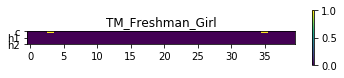

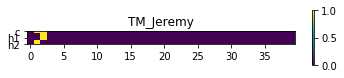

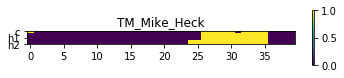

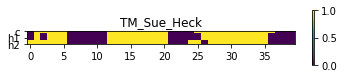

In [7]:
for curr_show in range(len(shows)):

    current_show_df = df[df['Show'] == shows[curr_show]]
    characters = pd.unique(current_show_df['Character']).tolist()

    for curr_character in range(len(characters)):

        curr = current_show_df[current_show_df['Character'] == characters[curr_character]]
        plt.figure(figsize = (6,1));
        c = curr['Computer'].values;
        j = curr['Human_J'].values;
        r = curr['Human_R'].values;

        plt.imshow(np.vstack((c,j,r)), vmin=0, vmax=1);
        label = shows[curr_show] + '_' + characters[curr_character]
        plt.title(label);
        plt.colorbar()
        plt.yticks([0,1,2], ('c','h1','h2'))
        #plt.legend()
        plt.show()
        plt.close()

In [8]:
y      = df['Computer'].values
y_pred = df['Referee_Human'].values
np.corrcoef(y, y_pred)

array([[1.        , 0.74663697],
       [0.74663697, 1.        ]])

In [13]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_pred, y)
roc_auc = auc(fpr, tpr)
roc_auc

0.8983085906648908

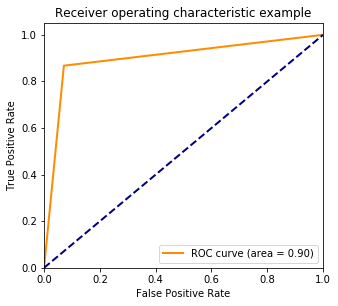

In [14]:
plt.figure(figsize = (5,4.5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [15]:
shows

['CEG', 'Q', 'ST', 'BL', 'TF', 'TM']

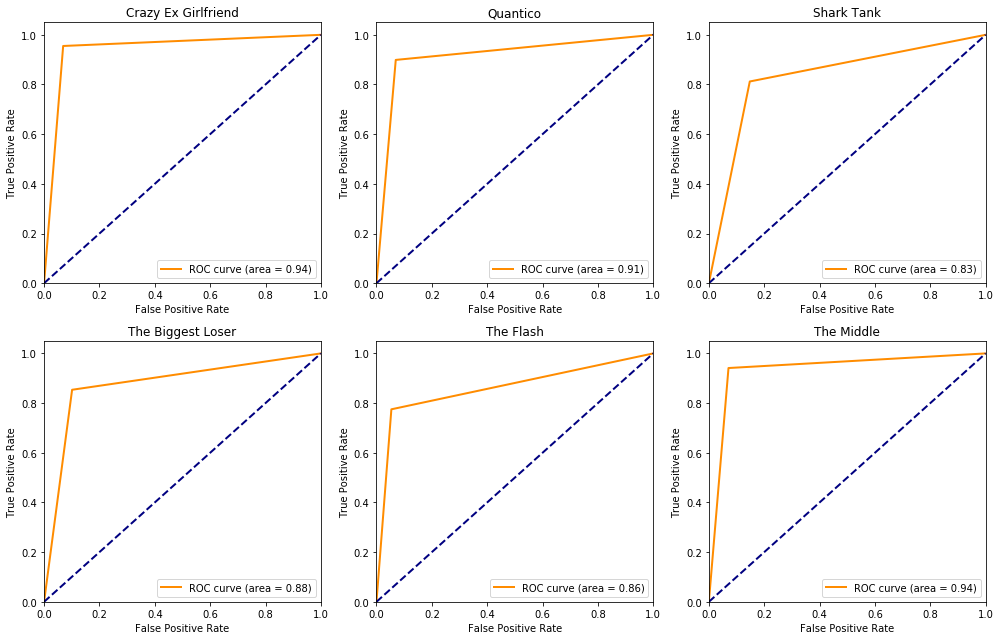

In [16]:
plt.figure(figsize = (14,9))

shownames = ['Crazy Ex Girlfriend', 
             'Quantico', 
             'Shark Tank', 
             'The Biggest Loser', 
             'The Flash', 
             'The Middle']

for curr_show in range(len(shows)):

    current_show_df = df[df['Show'] == shows[curr_show]]
    characters = pd.unique(current_show_df['Character']).tolist()
    
    
    #
    y      = current_show_df['Computer'].values
    y_pred = current_show_df['Referee_Human'].values
    np.corrcoef(y, y_pred)

    # compute ROC
    fpr, tpr, _ = roc_curve(y_pred, y)
    roc_auc = auc(fpr, tpr)
    roc_auc

    # Plot
    lw = 2
    plt.subplot(2,3,curr_show+1)
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(shownames[curr_show])
    plt.legend(loc="lower right")
    plt.tight_layout()
plt.show()